In [1]:
import xbbg
from xbbg import blp
import numpy as np
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.display.float_format = '{:,.2f}'.format

c:\users\boris\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\users\boris\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1

In [2]:
today = DT.date.today()
startdate = '1/1/2003'
enddate = today
writer = pd.ExcelWriter('mpca.xlsx')

In [3]:
def get_dict_inv(d):
    return {v: k for k, v in d.items()}

def standardize_data(df):
    return (df-df.mean())/df.std()

In [13]:
all_t={
    "sx0":"CESIGL Index",
    "sx1":"SNTEEUGX Index",
    "sx2":"SNTEEUH6 Index",
    "sx3":"SNTEUSH6 Index",
    "sx4":"SNTEUSGX Index",
    "sx5":"SNTEGAH6 Indexx",
    "sx6":"SNTEEUH0 Index",
    "sx7":"SNTEGAH0 Index",
    "sx8":"SNTELAH6 Index",
    "sx9":"SNTEUSP6 Index",
    "sx10":"SNTEUSH0 Index",
    "sx11":"SNTEUSI6 Index",
    "sx12":"SNTEASH6 Index",
    "sx13":"SNTEJPGX Index",
    "sx14":"SNTEEEH6 Index",
    "sx15":"SNTEASH0 Index",
    "sx16":"SNTEDEH0 Index",
    "sx17":"SNTEEUI6 Index",
    "sx18":"SNTEUSP0 Index",
    "sx19":"SNTEASP6 Index",
    "sx20":"SNTEDEH6 Index",
    "sx21":"SNTEEEH0 Index",
    "sx22":"SNTELAH0 Index",
    "sx23":"SNTEUSI0 Index",
    "sx24":"SNTEASGX Index",
    "sx25":"SNTEASI0 Index",
    "sx26":"SNTEASI6 Index",
    "sx27":"SNTEASP0 Index",
    "sx28":"SNTEEEI0 Index",
    "sx29":"SNTEEEI6 Index",
    "sx30":"SNTEEEP0 Index",
    "sx31":"SNTEEEP6 Index", 
    "sx32":"SNTEJPI6 Index", 
    "sx33":"SNTEJPP6 Index", 
    "sx34":"SNTELAI6 Index", 
    "sx35":"SNTELAP6 Index", 
    "sx36":"SNTELAI0 Index", 
    "sx37":"SNTELAP0 Index", 
 
}



all_t_inv= {v: k for k, v in all_t.items()}

In [14]:
df= blp.bdh(all_t.values(),'PX_LAST', startdate, enddate, periodicitySelection = "DAILY")
df.columns = df.columns.get_level_values(0)
df.rename(columns=lambda x:all_t_inv[x], inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df.tail()

,sx0,sx1,sx2,sx3,sx4,sx6,sx7,sx8,sx9,sx10,...,sx28,sx29,sx30,sx31,sx32,sx33,sx34,sx35,sx36,sx37
2022-05-27,9.10,-18.03,-29.75,-10.75,6.12,-5.50,3.59,-11.50,-7.00,24.50,...,-38.50,-35.50,-36.00,-34.00,-13.00,-10.00,-10.00,-13.00,-5.00,-11.00
2022-05-30,6.50,-18.03,-29.75,-10.75,6.12,-5.50,3.59,-11.50,-7.00,24.50,...,-38.50,-35.50,-36.00,-34.00,-13.00,-10.00,-10.00,-13.00,-5.00,-11.00
2022-05-31,11.70,-22.64,-34.00,-21.75,-2.87,-10.50,-4.78,-19.25,-18.50,18.00,...,-39.00,-39.00,-38.50,-38.00,-21.00,-19.00,-19.50,-19.00,-8.50,-16.00
2022-06-01,12.30,-22.64,-34.00,-21.75,-2.87,-10.50,-4.78,-19.25,-18.50,18.00,...,-39.00,-39.00,-38.50,-38.00,-21.00,-19.00,-19.50,-19.00,-8.50,-16.00
2022-06-02,8.60,-22.64,-34.00,-21.75,-2.87,-10.50,-4.78,-19.25,-18.50,18.00,...,-39.00,-39.00,-38.50,-38.00,-21.00,-19.00,-19.50,-19.00,-8.50,-16.00


In [15]:
TIME = df.index
print(TIME)

Index([2003-01-02, 2003-01-03, 2003-01-06, 2003-01-07, 2003-01-08, 2003-01-09,
       2003-01-10, 2003-01-13, 2003-01-14, 2003-01-15,
       ...
       2022-05-20, 2022-05-23, 2022-05-24, 2022-05-25, 2022-05-26, 2022-05-27,
       2022-05-30, 2022-05-31, 2022-06-01, 2022-06-02],
      dtype='object', length=5059)


In [16]:
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)
PCS = pca.fit_transform(df_normalized)

In [17]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)


       PC0   PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  ...  PC27  \
sx0  -0.11  0.12  0.11 -0.15  0.38  0.07  0.82  0.13 -0.22 -0.09  ... -0.00   
sx1  -0.17 -0.06 -0.22 -0.05  0.39 -0.28 -0.10 -0.02  0.20 -0.14  ... -0.33   
sx2  -0.19  0.16 -0.05 -0.03  0.28 -0.07 -0.26 -0.06 -0.01 -0.17  ...  0.16   
sx3  -0.12  0.25  0.00 -0.10 -0.18 -0.04  0.10 -0.31  0.03 -0.22  ... -0.08   
sx4  -0.17  0.09 -0.28  0.05 -0.20  0.10  0.08 -0.02  0.01 -0.18  ...  0.56   
sx6  -0.10 -0.17 -0.24 -0.04  0.36 -0.32  0.03  0.00  0.25 -0.06  ...  0.29   
sx7  -0.18 -0.17 -0.17  0.02  0.03  0.00  0.05  0.00  0.07  0.01  ... -0.18   
sx8  -0.20  0.08  0.10 -0.26 -0.05  0.02 -0.10  0.38 -0.02 -0.06  ...  0.01   
sx9  -0.14  0.23 -0.02 -0.12 -0.19  0.01  0.09 -0.32  0.12 -0.25  ... -0.05   
sx10 -0.15 -0.01 -0.35  0.13 -0.15  0.15  0.05  0.16 -0.00 -0.10  ... -0.12   
sx11 -0.11  0.26  0.02 -0.09 -0.17 -0.07  0.10 -0.29 -0.03 -0.19  ... -0.10   
sx12 -0.19  0.14  0.16  0.11 -0.06 -0.01  0.03  0.07

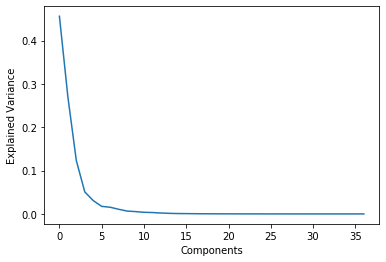

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()


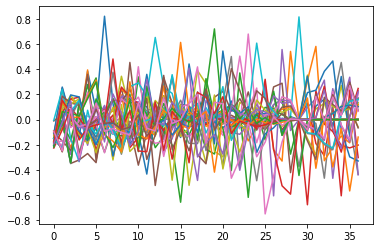

In [19]:
plt.plot(pca.components_)
plt.show()

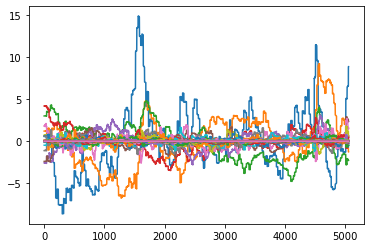

In [20]:
plt.plot(PCS)
plt.show()

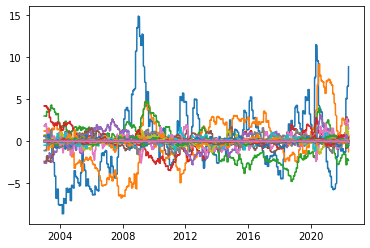

In [23]:
SNTX = pd.DataFrame.from_records(data=PCS, columns = ['sx0','sx1', 'sx2', 'sx3', 'sx4', 'sx5', 'sx6', 'sx7', 'sx8', 'sx9', 'sx10', 'sx11', 'sx12', 'sx13', 'sx14', 'sx15', 'sx16', 'sx17', 'sx18', 'sx19', 'sx20', 'sx21', 'sx22','sx23','sx24','sx25','sx26','sx27','sx28','sx29','sx30','sx31', 'sx32','sx33','sx34','sx35','sx36'], index=TIME)

plt.plot(SNTX)
plt.show()

In [24]:
SNTX.head()

,sx0,sx1,sx2,sx3,sx4,sx5,sx6,sx7,sx8,sx9,...,sx27,sx28,sx29,sx30,sx31,sx32,sx33,sx34,sx35,sx36
2003-01-02,0.56,1.20,3.00,4.19,-2.58,-2.40,1.81,-1.12,0.71,-0.47,...,-0.01,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
2003-01-03,0.56,1.20,3.00,4.19,-2.58,-2.40,1.81,-1.12,0.71,-0.47,...,-0.01,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
2003-01-06,0.56,1.20,3.00,4.19,-2.58,-2.40,1.81,-1.11,0.71,-0.47,...,-0.01,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
2003-01-07,0.56,1.20,3.00,4.19,-2.58,-2.40,1.80,-1.12,0.72,-0.47,...,-0.01,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00
2003-01-08,0.56,1.20,3.00,4.19,-2.58,-2.40,1.81,-1.12,0.71,-0.47,...,-0.01,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00


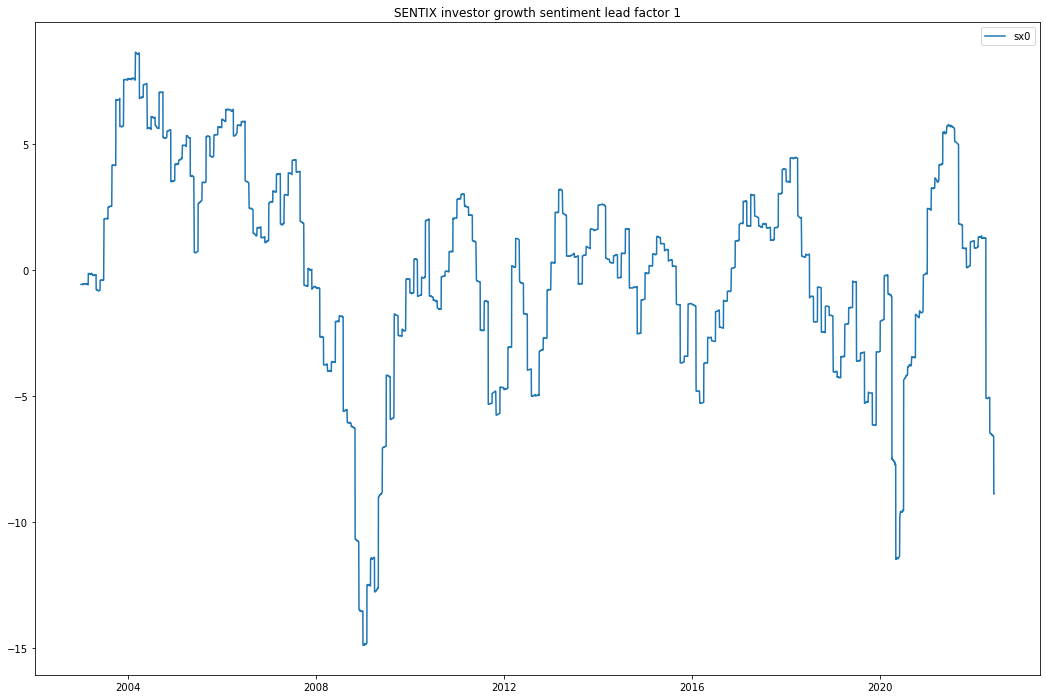

In [31]:
SNTX1 = -1*SNTX.drop([ 'sx1', 'sx2', 'sx3', 'sx4', 'sx5', 'sx6', 'sx7', 'sx8', 'sx9', 'sx10', 'sx11', 'sx12', 'sx13', 'sx14', 'sx15', 'sx16', 'sx17', 'sx18', 'sx19', 'sx20', 'sx21', 'sx22','sx23','sx24','sx25','sx26','sx27','sx28','sx29','sx30','sx31', 'sx32','sx33','sx34','sx35','sx36' ], axis=1)
SNTX1.plot(figsize=(18,12), title="SENTIX investor growth sentiment lead factor 1")
plt.show()

In [28]:
SNTX.tail()

,sx0,sx1,sx2,sx3,sx4,sx5,sx6,sx7,sx8,sx9,...,sx27,sx28,sx29,sx30,sx31,sx32,sx33,sx34,sx35,sx36
2022-05-27,6.58,-0.73,-2.21,-0.08,-0.28,2.59,1.53,0.41,1.18,-0.45,...,0.03,-0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
2022-05-30,6.59,-0.74,-2.22,-0.06,-0.31,2.59,1.46,0.40,1.20,-0.45,...,0.03,-0.01,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
2022-05-31,8.86,-1.24,-2.27,0.47,0.15,2.35,1.61,0.64,0.62,-0.55,...,0.03,-0.02,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
2022-06-01,8.86,-1.24,-2.27,0.47,0.15,2.35,1.63,0.65,0.62,-0.55,...,0.03,-0.02,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
2022-06-02,8.87,-1.25,-2.29,0.49,0.11,2.34,1.52,0.63,0.64,-0.54,...,0.03,-0.02,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00


In [29]:
SNTX1.tail()

,sx0
2022-05-27,-6.58
2022-05-30,-6.59
2022-05-31,-8.86
2022-06-01,-8.86
2022-06-02,-8.87


In [30]:
SNTX.to_excel('C:\\B\\MPCA\\SNTXPCA.xlsx')